In [ ]:
!pip install qiskit
!pip install numpy
!pip3 install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 577.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB

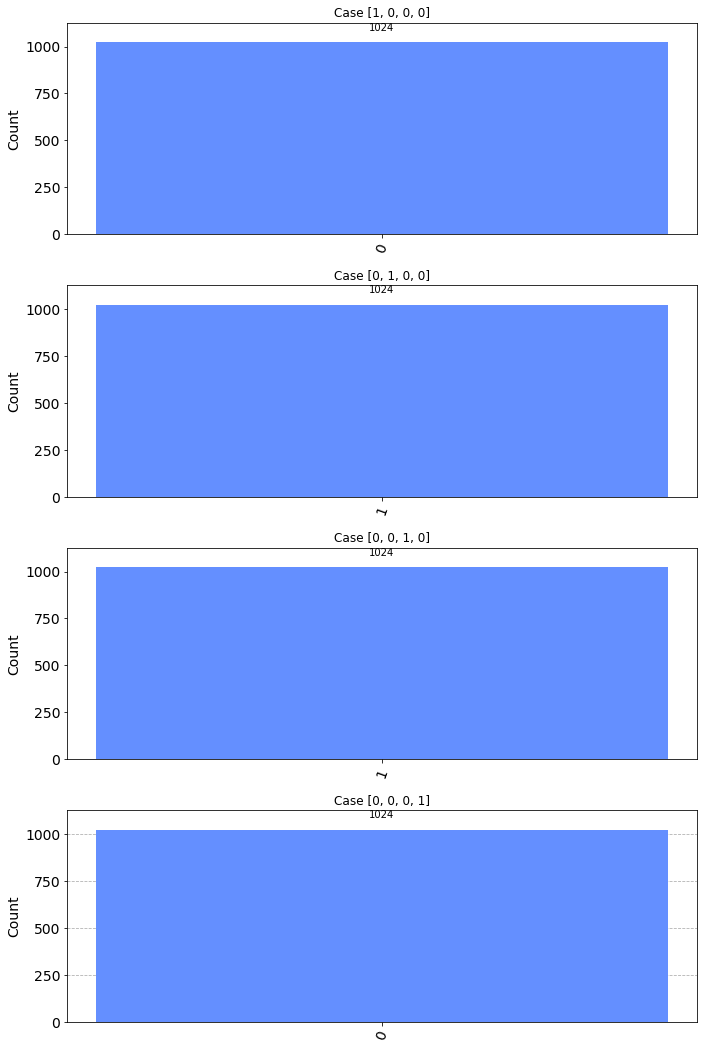

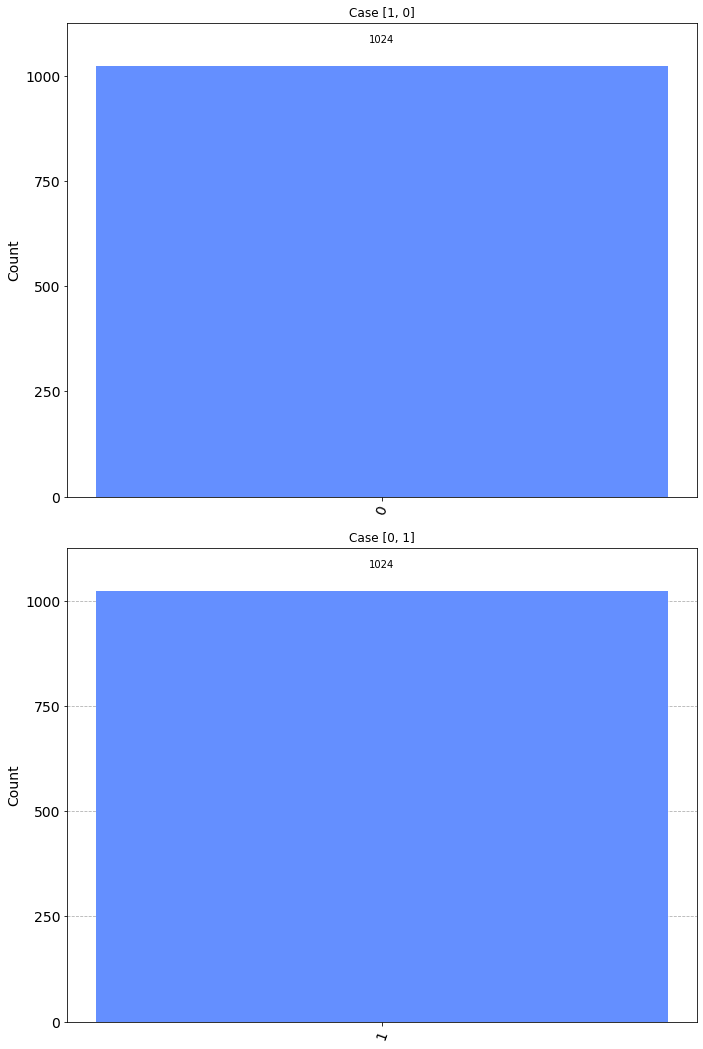

In [ ]:
!curl -s https://raw.githubusercontent.com/eginez/qiskit-exp/main/src/qiskitOne.ipynb > qiskitOne.ipynb
%run qiskitOne.ipynb

## Agenda
- Why quantum computing?
- A simple representation.
- Measuring qbits.
- Some simple one qubit gates

# Why quantum
Suppouse you want to find out how many ones you have in a secret string s. To do this classicaly you would need to query each of the characters/bits of s for example

In [ ]:
def secret_str(num_bits: int = 3) -> str:
  import random
  res = ''
  for i in range(num_bits):
    n = random.random()
    if n > 0.5:
      res += '1'
    else:
      res += '0'
  return res

SECRET_STR = secret_str(3)



In [ ]:
def query_secret(pos_to_query: int) -> str: # <=== We can think of this as classical oracle
  return SECRET_STR[pos_to_query]

from typing import Tuple

def discover_secret(secrent_len: int) -> Tuple[str, int]:
  discovered_secret = ''
  count = 0
  for i in range(secrent_len):
    count += 1
    if query_secret(i) == '0':
      discovered_secret += '0'
    else:
      discovered_secret += '1'
  return discovered_secret, count


d, called = discover_secret(len(SECRET_STR))
if d == SECRET_STR:
  print(f'Discovered secret: {d} with {called} calls to the classical oracle' )

Discovered secret: 001 with 3 calls to the classical oracle


### Notice that classical computers can't do better than len(SECRET_STR) number of calls to our query_str func

# Quantum computers can do better than that

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='e2b39b23-8448-4fe1-8bce-bf48e3abae40', job_id='19dd360b-1f1f-45e8-8fe6-c274138a3acf', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(clbit_labels=[['c6', 0], ['c6', 1], ['c6', 2]], creg_sizes=[['c6', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=4, name='circuit-580', qreg_sizes=[['x', 4]], qubit_labels=[['x', 0], ['x', 1], ['x', 2], ['x', 3]]), status=DONE, seed_simulator=3863470236, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 3, 'parallel_state_update': 2, 'sample_measure_time': 0.000281352, 'num_qubits': 4, 'device': 'CPU', 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'fusion': {'applied': False, 'max_fused_qubits

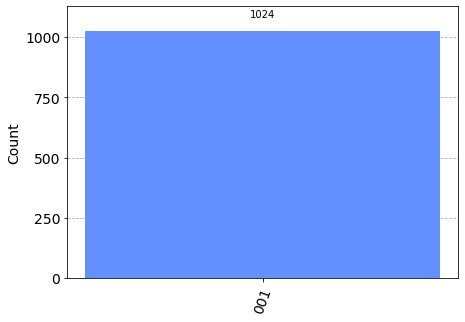

In [ ]:
def q_discover_secret():
  # turn our query_secret into a quantum function
  # encodo our input bits, and call the quantum algo
  # bit_search is creating the quantum oracle 
  circ = bit_search(SECRET_STR)
  res, cts = exec_circuit(circ)
  return res, cts
res, cts = q_discover_secret()
print(res)
plot_histogram(cts)

## Attempting to describe some of quantum mechanics's law
- In digital computing we usually represent the smallest piece of information
with, a bit, by measuring the electricity

Logical bit| Physical bit
--------   |-------
0         | Low Volt 
1         | Hight Volt

- But the scientific comunity has been asking themselves, can we reprsent
information wiht a single particle.  
- The behaviours of  particles is the domain of quantum mechanics.
QM tells that an electron has a property called spin and the spin can be
up or down

Logical bit| Electron representation
--------   |-------
0         | Spin Up
1         | Spin Down


- Additionally scientics in a lab can build a machine that measures the spin
of an electron.

((( e ))) ====> [[[ Measure Device ]]] = Spin up

((( e ))) ====> [[[ Measure Device ]]] = Spin down




## First Law of Quantum Mechanics

1.  If a particle (eg an electron) can be in a state |0> (or spin up or 0) or |1> (or spin down or 1). Then it can also be in a **superposition** of |0> and |1>, where superposition means that particle can be in:
alpha on |0>  and beta on |1>, where alpha and beta are numbers satisfying

    alpha ^2 + beta^2 = 1



For example:

An electron could be in a superposition: 
- 0.6|0> + 0.8|1>,    but it can also be in state 
- 0.6|0> - 0.8|1>

And that's what we called a qubit


In [ ]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector


## From the qiskit site: https://qiskit.org/textbook/ch-states/representing-qubit-states.html

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
initial_state = [1,0]   # Define initial_state as |0>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector



Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [ ]:
def single_qubit(initial_state):
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
  qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result
  

In [ ]:
res = single_qubit([0,1])
print(res.get_statevector())


Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


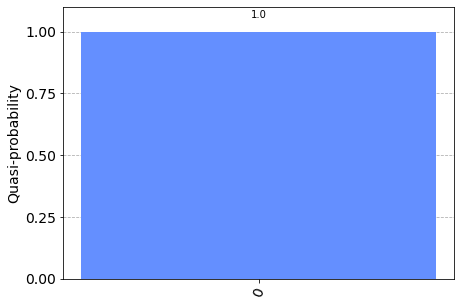

In [ ]:
res = single_qubit([1,0])
print(res.get_statevector())
plot_histogram(res.get_counts())

## Second Quantum Mechanics Law
2. For a particle in state:
    
    alpha|0> and beta|1>

  If you measure such particle then:
  - You will read |0> with probablity alpha^2
  - You will read |1> with probabiblity beta^2

  **And**
  - If particle was read as |0>, the particle's state changes to 1|0> + 0|0> aka |0>
  - If a particle was read as |1> ==> 0|0> + 1|0> aka |1>


Statevector([0.8+0.j, 0.6+0.j],
            dims=(2,))


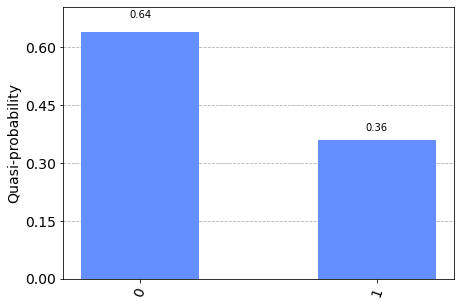

In [ ]:
# Setup a qubit with in the state .8|0> + 0.6|1>
res = single_qubit([0.8,0.6])
print(res.get_statevector())
plot_histogram(res.get_counts())

In [ ]:
# We should expect a failure here since 0.5 ^2 + 0.5 ^2 != 1
res = single_qubit([0.5,0.5])
print(res.get_statevector())
plot_histogram(res.get_counts())

QiskitError: ignored

In [ ]:
# Ok now we can write the simplest of circuits
# Initialize a qubit and mesaure it
qc = QuantumCircuit(1)
qc.initialize([1,0], 0)
qc.measure_all()
qc.draw()


┌─────────────────┐ ░ ┌─┐
     q: ┤ Initialize(1,0) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

In [ ]:
def single_qubit_and_mesure(initial_state):
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
  qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
  qc.measure_all() # Measure the qubit
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result, qc
  

In [ ]:
res, qc = single_qubit_and_mesure([1,0])
qc.draw()


┌─────────────────┐ ░ ┌─┐ statevector 
     q: ┤ Initialize(1,0) ├─░─┤M├──────░──────
        └─────────────────┘ ░ └╥┘      ░      
meas: 1/═══════════════════════╩══════════════
                               0

In [ ]:
from math import sqrt
res, qc = single_qubit_and_mesure([1/sqrt(2),1/sqrt(2)])
qc.draw()
print(res.get_statevector())


Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


# MultiQbit states
(based on [cmu's qc lectures](https://youtu.be/PjenZ60JdVM?list=PLm3J0oaFux3YL5qLskC6xQ24JpMwOAeJz&t=3381) and [Quantum Computation and Quantum Information](https://www.amazon.com/Quantum-Computation-Information-10th-Anniversary/dp/1107002176))
- Joint states, unentangled
- Joint states, entangled.
- Can we use this?


## Joint states

To begin recall that a quantum bit can be represented via

$|\psi> = a|0> + b|1>$

In fact let's introduce one particular state, We'll call this  the "plus" state, and we'll use it this state later.

$|+> = \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$

Now that we have an understanding on how to represent the states of single qubits, let's explore what happens when we combine multiple qubits.


Imagine Alice has a qubit |psi> and Bob has a qubit on state |phi>

The proper way to understand the state of psi and phi is to view them in a joint state (unless they never interact whatsoever). In fact the new |psi> |phi> state is 4 dimensional system, e.g.:

$ |\psi> = 1|0> + 0|1> $

$|\phi> = 0|0> + 1|1> $

$|\psi and \phi> = 1*0|00> + 1*1|01> + 0*0|10> + 0*1|11> = 1|01>$

where |xy>, x represents the basis state of psi and y the basis state of phi


In general the join state of two qubits is equal to the tensor product of their states:

$|\psi> = a_0|0> + a_1|1>$ and 

$|\phi> = b_0|0> + b_1|1>$ 

$a_0b_0|00> + a_0b_1|01>+a_1b_0|10> + a_1b_1|11>$

\begin{align}
\begin{pmatrix}a_0\\a_1 \end{pmatrix} \otimes\begin{pmatrix}b_0\\b_1 \end{pmatrix}
\end{align}

eg

$|0> \otimes |0> = \begin{pmatrix}1\\0 \end{pmatrix} \otimes\begin{pmatrix}1\\0 \end{pmatrix} = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix} = |00> $

In [ ]:
from typing import Dict, Tuple, Any
def n_qubit_and_mesure(initial_state:Dict[int,Tuple[int,int]]) -> Any:
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  num_qubits = len(initial_state)
  qc = QuantumCircuit(num_qubits)  # Create a quantum circuit with one qubit
  for qb, state in initial_state.items():
    qc.initialize(state, qb) # Apply initialisation operation to the nth qubit
  qc.measure_all() # Measure the qubit
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result, qc
 

In [ ]:
# |00>
qb_2 = {
    0: (1, 0),
    1: (1, 0)
}
res, qc = n_qubit_and_mesure(qb_2)
qc.draw()


┌─────────────────┐ ░ ┌─┐    statevector 
   q_0: ┤ Initialize(1,0) ├─░─┤M├─────────░──────
        ├─────────────────┤ ░ └╥┘┌─┐      ░      
   q_1: ┤ Initialize(1,0) ├─░──╫─┤M├──────░──────
        └─────────────────┘ ░  ║ └╥┘      ░      
meas: 2/═══════════════════════╩══╩══════════════
                               0  1

In [ ]:
print(res.get_statevector())

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


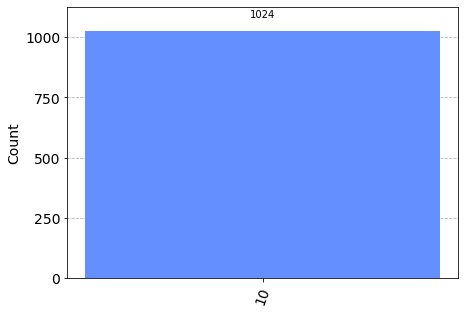

In [ ]:
# |01>
qb_2 = {
    0: (1, 0),
    1: (0, 1)
}
res, qc = n_qubit_and_mesure(qb_2)
plot_histogram(res.get_counts())

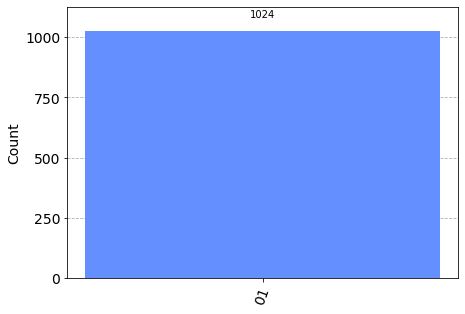

In [ ]:
# |10>
qb_2 = {0: (0, 1),
    1: (1, 0)
}
res, qc = n_qubit_and_mesure(qb_2)
plot_histogram(res.get_counts())

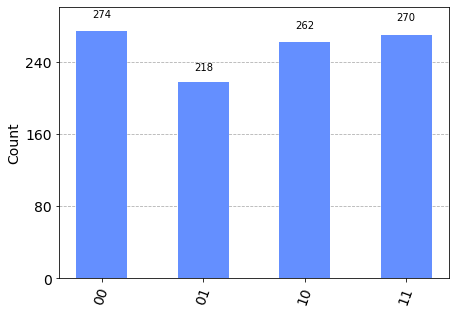

In [ ]:
# |+> x |+> = |++>
sqrt_2 = sqrt(2)
qb_2 = {
    0: (1/sqrt_2, 1/sqrt_2),
    1: (1/sqrt_2, 1/sqrt_2)
}
res, qc = n_qubit_and_mesure(qb_2)
sv = res.get_statevector()
plot_histogram(res.get_counts())

## TODO re-run job on non simualte backends.

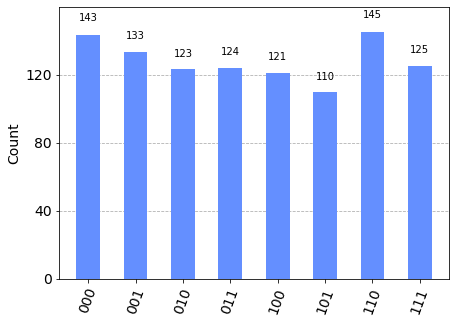

In [ ]:
# |+> x |+> x |+> = |+++>
qb_3 = {
    0: (1/sqrt_2, 1/sqrt_2),
    1: (1/sqrt_2, 1/sqrt_2),
    2: (1/sqrt_2, 1/sqrt_2),
}
res, qc = n_qubit_and_mesure(qb_3)
plot_histogram(res.get_counts())

Now let's highlight the following state:

$1/2|00> + 1/2|10> + 1/2|01> + 1/2|11>$  

As we saw above this state is no more than the tensor product of

$|+> ⊗ |+>$

In general any joint state that can be factorted into 
$|\psi> ⊗ |Φ>$ does not consitute an entangled state.

In [ ]:
sqrt_2 = sqrt(2)
## Hmm how are we creating these states?
qb_2 = {
    0: (1/sqrt_2, 1/sqrt_2),
    1: (1/sqrt_2, 1/sqrt_2)
}
res, qc = n_qubit_and_mesure(qb_2)
qc.draw()


┌─────────────────────────────┐ ░ ┌─┐    statevector 
   q_0: ┤ Initialize(0.70711,0.70711) ├─░─┤M├─────────░──────
        ├─────────────────────────────┤ ░ └╥┘┌─┐      ░      
   q_1: ┤ Initialize(0.70711,0.70711) ├─░──╫─┤M├──────░──────
        └─────────────────────────────┘ ░  ║ └╥┘      ░      
meas: 2/═══════════════════════════════════╩══╩══════════════
                                           0  1

Let's introduce two operations

- Hadamard or [H] transforms |0> -> |+>
- Controlled NOT or CNOT:
  - Acts on 2 qubits: a control and a target qubit
  - Control qubit never changes
  - Target qubits: Flips if the control bit is |1>, otherwise stays the same.

In [ ]:
def simple_hadamard(num_qubits = 1) -> Any:
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  qc = QuantumCircuit(num_qubits)  # Create a quantum circuit with one qubit
  qc.h(0)
  qc.measure_all() # Measure the qubit
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result, qc

res, qc = simple_hadamard()
qc.draw()

┌───┐ ░ ┌─┐ statevector 
     q: ┤ H ├─░─┤M├──────░──────
        └───┘ ░ └╥┘      ░      
meas: 1/═════════╩══════════════
                 0

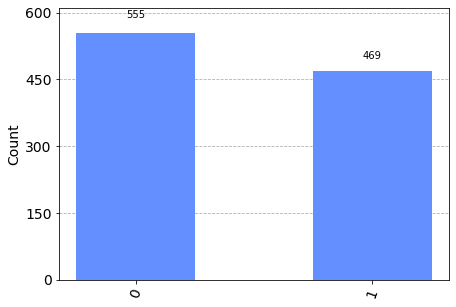

In [ ]:
## 1/sqrt(2)(|0> + |1>)
plot_histogram(res.get_counts())

In [ ]:
def simple_cnot(initial_state={0: (1, 0), 1: (1, 0)}) -> Any:
  if initial_state:
    assert len(initial_state) == 2, "only 2 qubits"
  num_qubits = 2 
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  qc = QuantumCircuit(num_qubits)  # Create a quantum circuit with one qubit
  for qb, state in initial_state.items():
    qc.initialize(state, qb) # Apply initialisation operation to the nth qubi
  qc.cnot(0,1)
  qc.measure_all() # Measure the qubit
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result, qc

res, qc = simple_cnot()
qc.draw()

┌─────────────────┐      ░ ┌─┐    statevector 
   q_0: ┤ Initialize(1,0) ├──■───░─┤M├─────────░──────
        ├─────────────────┤┌─┴─┐ ░ └╥┘┌─┐      ░      
   q_1: ┤ Initialize(1,0) ├┤ X ├─░──╫─┤M├──────░──────
        └─────────────────┘└───┘ ░  ║ └╥┘      ░      
meas: 2/════════════════════════════╩══╩══════════════
                                    0  1

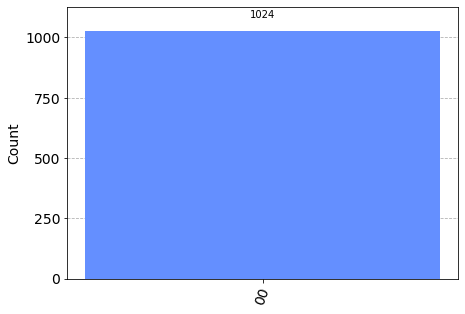

In [ ]:
plot_histogram(res.get_counts())

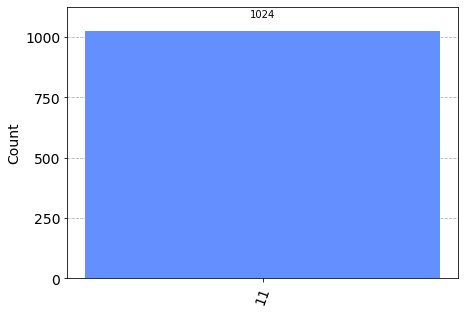

In [ ]:
res, qc = simple_cnot(initial_state={0: (0, 1), 1:(1, 0)})
plot_histogram(res.get_counts())


In [ ]:
def bell_state() -> Any:
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  qc = QuantumCircuit(2)  # Create a quantum circuit 
  qc.h(0)
  qc.cnot(0, 1)
  qc.measure_all() # Measure the qubit
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result, qc
res, qc = bell_state()
qc.draw()

┌───┐      ░ ┌─┐    statevector 
   q_0: ┤ H ├──■───░─┤M├─────────░──────
        └───┘┌─┴─┐ ░ └╥┘┌─┐      ░      
   q_1: ─────┤ X ├─░──╫─┤M├──────░──────
             └───┘ ░  ║ └╥┘      ░      
meas: 2/══════════════╩══╩══════════════
                      0  1

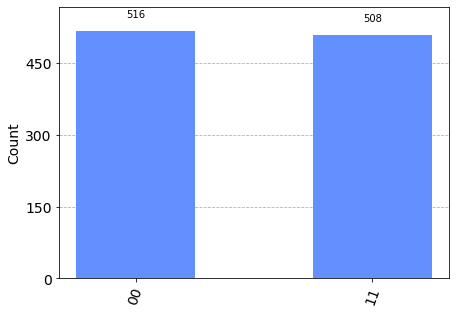

In [ ]:
plot_histogram(res.get_counts())


The circuit above created an interesting state, namely:

$\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$

We call this the Bell State (or an EPR pair)

Notice this can not be represented as a tensor product of two qubits, thus we call the above state entangled.

Formally an entangled joint state is not of the form: $|\psi> \otimes |\phi>$



An important detail of an entangle pair of qubits is that.
 - There is a 50% chance of measuring  $ |\psi> = |0>$ but if we we'll immediatly know that $|Φ> = |0>$, **regardless of phi's location.**

# No cloning
Let's review a fundamental property of quantum information.

Given a state $|\psi>$, there is not way to copy such state.
Consider the following circuit.


In [ ]:
from math import sqrt as sr
def random_amplitudes_sqr() -> Tuple[float, float]:
  import random
  import math
  alpha = random.random()
  beta_sq = 1 - alpha * alpha
  return alpha*alpha, beta_sq

a, b = random_amplitudes_sqr()
assert a + b == 1.0


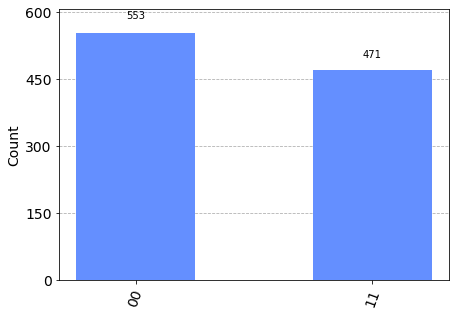

In [ ]:
res, qc = simple_cnot(initial_state={0: (sr(a),sr(b)), 1: (1, 0)})
plot_histogram(res.get_counts())

However the below does not make a lot of sense were are missing the |01> and |01> states, since we know that the 
resulting state must be of the form

$|\psi>|\psi> = a^2|00> a*b|01> + a*b|10> + b^2|11>$

It is in fact impossible to make a copy of a arbitrary state $|\psi>$ and this property is known as the **no-cloning** theorem


# Quantum Teleportation

Ok we can't copy a qubit state, but can we move it? (without measuring it of course, since measuring the qubit destroys the state)

 Yes we can, but it relies on classical information as well as quantum information. 

Here is the outline of the process

A wants to send an arbitrary state $|\psi>$ to B.

1. A and B prepare an EPR pair of qubits, A stays with one of the qubits and B keeps the second one.
2. A puts her qubits through a the circuit below
3. Finally A measures both her qubits, one of the entangle pairs and the one she wishes to move.
4. A communicates to B (over a classical channel) the result of the measurement and B does the following

A measurment| Final Joint State|Action
------| -------|------
00 |$a|0> + b|1>$ | do nothing, B's qubit alread has the state.
01 |$a|1> + b|0>$ | Apply an X gate to B's qubit.
10 |$a|0> - b|1>$ | Apply an Z gate to B's qubit.
11 |$a|1> + b|1>$ | Apply an Z,X gate to B's qubit.


After the operations above the state arbitrary state $|\psi>$ is now with B

In [ ]:
def teleportation() -> Any:
  sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
  qc = QuantumCircuit(3,3)  # Create a quantum circuit 
  qc.h(1)
  qc.cnot(1, 2)
  qc.cnot(0, 1)
  qc.h(0)
  qc.barrier()
  qc.measure(0,0) # Measure arbirary q qubit
  qc.measure(1,1) # Measure one of the entagled qubit
  qc.z(2).c_if(0, 1)
  qc.x(2).c_if(1, 1)
  qc.measure(2,2)
  qc.save_statevector()   # Tell simulator to save statevector
  qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
  result = sim.run(qobj).result() # Do the simulation and return the result
  return result, qc
res, qc = teleportation()
qc.draw()

┌───┐ ░ ┌─┐                             statevector 
q_0: ────────────■──┤ H ├─░─┤M├──────────────────────────────────░──────
     ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐                               ░      
q_1: ┤ H ├──■──┤ X ├──────░──╫─┤M├───────────────────────────────░──────
     └───┘┌─┴─┐└───┘      ░  ║ └╥┘   ┌───┐      ┌───┐   ┌─┐      ░      
q_2: ─────┤ X ├───────────░──╫──╫────┤ Z ├──────┤ X ├───┤M├──────░──────
          └───┘           ░  ║  ║    └─╥─┘      └─╥─┘   └╥┘      ░      
                             ║  ║ ┌────╨────┐┌────╨────┐ ║              
c: 3/════════════════════════╩══╩═╡ c_0=0x1 ╞╡ c_1=0x1 ╞═╩══════════════
                             0  1 └─────────┘└─────────┘ 2